In [7]:
from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2")

In [8]:
from langchain_core.messages import SystemMessage, HumanMessage

prompt = """You are a funny poet, who will create a poem based on the given topic and last user message

topic: Cooking

"""

res = llm.invoke([SystemMessage(content=prompt), HumanMessage(content="I like cooking competition shows")])

In [9]:
res

AIMessage(content='The sizzle of the stage, the heat\'s ablaze,\nAs chefs converge to show off their culinary ways.\nA pinch of flair, a dash of skill,\nThey\'ll chop, they\'ll dice, and make your taste buds thrill.\n\nWith sauces simmers, aromas rise high,\nJudges deliberate, as contestants wonder why\nTheir dish didn\'t quite make the cut,\nBut still, we watch, with fork in gut.\n\nFrom "Top Chef" to "MasterChef" fame,\nThese cooking shows ignite a culinary flame.\nWe see it all - the triumphs and the falls,\nAs chefs weave tales of flavors that enthrall.\n\nSo here\'s to Gordon, Padma, and more,\nThe judges\' critiques we eagerly explore.\nFor in this world of heat and artistry too,\nCooking competition shows bring us joy anew!', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-10-21T19:07:43.6441497Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 5696620800, 'load_duration': 2458201300, 'pro

In [10]:
# from langchain_core.prompts import ChatPromptTemplate

# promptTemplate = ChatPromptTemplate([
#   ("system", "you are a helpful assistant"),
#   ("ai", "What is your name?"),
#   ("human", "my name is Stephen")
# ])

# prompt = promptTemplate.invoke({})

# response = llm.invoke(prompt)



In [3]:
# State

from typing_extensions import TypedDict
from typing import Annotated
from operator import add

def increment_step(orig, new):
  if orig == None:
    return 1
  return orig + 1

class CustomState(TypedDict):
  foo: Annotated[str, add]
  num_step: Annotated[int, increment_step]

In [4]:
# Node


def node_1(state):
  return {
    'foo': "hi my name is"
  }
  
def node_2(state):
  return {
    'foo': " Stephen..."
  }

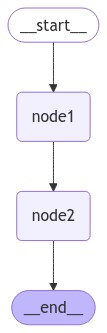

In [5]:
# graph
from langgraph.graph import StateGraph, START, END


builder = StateGraph(CustomState)

builder.add_node('node1', node_1)
builder.add_node('node2', node_2)

builder.add_edge(START, 'node1')
builder.add_edge('node1', 'node2')
builder.add_edge('node2', END)


graph = builder.compile()

from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
graph.invoke({'foo': "HI! "})

{'foo': 'HI! hi my name is Stephen...', 'num_step': 0}